# 



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import LineString
import rasterio as rio
import pandas as pd

In [2]:
import sys
sys.path.append('/Users/home/whitefar/DATA/code/REMOTE_SENSING/ICESAT/')
from cross_channel import icesat_dataset

In [3]:
ds = icesat_dataset("/Volumes/arc_02/REMOTE_SENSING/ICESAT2/ATLAS/ATLXI/ds_subset_kamb_20201111.nc")

For this dataset
cycle number, corresponding number of points
9    2356
8    2356
7    2356
6    2356
5    2356
4    2356
3    2356
Name: cycle_number, dtype: int64
cycle number, corresponding number of non NaN points
3    2334
8    2071
7    1568
5    1281
6    1267
4    1261
9     251
Name: cycle_number, dtype: int64


In [15]:
ds.gda['dates'] = [ts.date() for ts in ds.gda.utc_time]
ds.gda.dates.unique()

array([datetime.date(2019, 4, 5), datetime.date(2019, 4, 9),
       datetime.date(2019, 4, 21), datetime.date(2019, 4, 25),
       datetime.date(2019, 5, 8), datetime.date(2019, 5, 24),
       datetime.date(2019, 6, 6), NaT, datetime.date(2019, 6, 22),
       datetime.date(2019, 6, 26), datetime.date(2019, 8, 7),
       datetime.date(2019, 8, 22), datetime.date(2019, 9, 9),
       datetime.date(2019, 9, 20), datetime.date(2019, 9, 24),
       datetime.date(2019, 10, 4), datetime.date(2019, 10, 8),
       datetime.date(2019, 10, 19), datetime.date(2019, 10, 23),
       datetime.date(2019, 11, 6), datetime.date(2019, 12, 20),
       datetime.date(2020, 1, 3), datetime.date(2020, 1, 18),
       datetime.date(2020, 1, 22), datetime.date(2020, 2, 5),
       datetime.date(2020, 2, 20), datetime.date(2020, 3, 9),
       datetime.date(2020, 3, 20), datetime.date(2020, 3, 24),
       datetime.date(2020, 4, 3), datetime.date(2020, 4, 7),
       datetime.date(2020, 4, 22), datetime.date(2020, 5, 

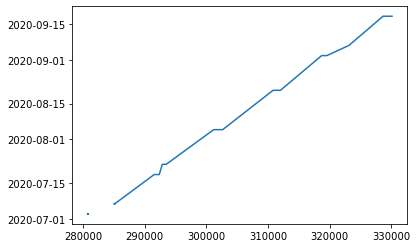

In [37]:
plt.plot(ds.gda[ds.gda.cycle_number==8].utc_time)

In [33]:
ds.dadh.cycle_number.max()

3

In [4]:
print(dir(ds))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'channel_mid', 'gda', 'gda_lines', 'getdata_alllines', 'getdata_dhdt', 'getdata_line', 'is_lines', 'meta', 'plot_dhdt_crosssection', 'plot_dhdt_crosssection_map', 'plot_dhdt_map', 'plot_icesat_lines_map', 'plot_line_crosssection', 'plot_multiple_dhdt_crosssection', 'plot_multiple_dhdt_crosssection_map']


In [24]:
ds.plot_icesat_lines_map()


In [25]:
ds.getdata_alllines(buff=40)

icesat_line_number    0     2      3      4      5    6      7      8      9   \
cycle_number                                                                    
3                   67.0  84.0  192.0  192.0  189.0  8.0  209.0  212.0  154.0   
4                   64.0  84.0    3.0  186.0  183.0  6.0  206.0   11.0  146.0   
5                    3.0   3.0  187.0    3.0  183.0  5.0  204.0    8.0    8.0   
6                   61.0  81.0  170.0  183.0  180.0  8.0   11.0   14.0  142.0   
7                    6.0   3.0  189.0    6.0  186.0  5.0  114.0  206.0   45.0   
8                    3.0  84.0  189.0  189.0  186.0  8.0  209.0  212.0  154.0   
9                    NaN   NaN    NaN    NaN    NaN  NaN    NaN    NaN    2.0   

icesat_line_number     11     12     13     14  
cycle_number                                    
3                   131.0  179.0  153.0  128.0  
4                     3.0  176.0    5.0    6.0  
5                   128.0  177.0    5.0  119.0  
6                   125.0

In [26]:
ds.plot_dhdt_map(cycle_number_from=3,cycle_number_till=7,vmin=-2,vmax=2)

In [27]:
ds.dadh['dates'] = [ts.date() for ts in ds.dadh.utc_time]
ds.dadh.dates.unique()

array([datetime.date(2019, 4, 5), datetime.date(2019, 4, 9),
       datetime.date(2019, 4, 21), datetime.date(2019, 4, 25),
       datetime.date(2019, 5, 8), datetime.date(2019, 5, 24),
       datetime.date(2019, 6, 6), NaT, datetime.date(2019, 6, 22),
       datetime.date(2019, 6, 26)], dtype=object)

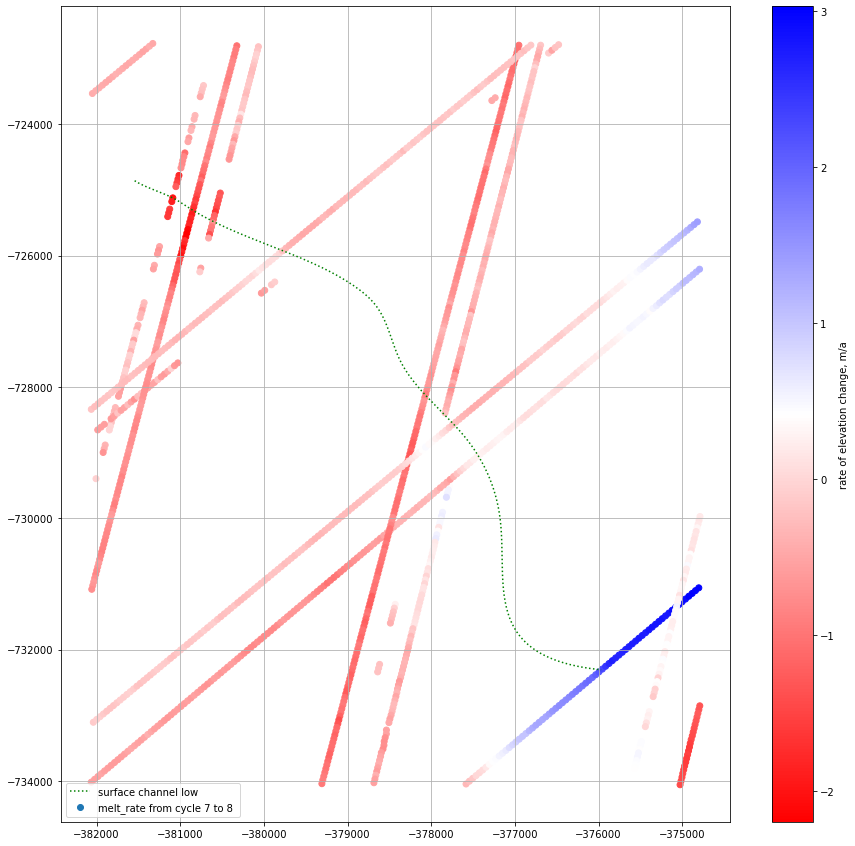

In [14]:
ds.plot_dhdt_map(cycle_number_from=7,cycle_number_till=8)

In [12]:
ds.plot_multiple_dhdt_crosssection_map(cycle_number_from=3,cycle_number_till=8,
                                       icesat_lines = [[14,'up'],[13,'down'],[12,'up'],[8,'down'],
                                                       [7,'up'],[6,'down']],
                                      buff=100,vmin=-2.0,vmax=2.0)

In [10]:
ds.plot_multiple_dhdt_crosssection(cycle_number_from=3,cycle_number_till=8,                                    
                                   icesat_lines = [[14,'up'],[13,'down'],[12,'up'],[8,'up'],
                                                       [7,'down'],[6,'up']])

# plot rema diff with icesat2 diff

In [11]:
cycle_number_from=3
cycle_number_till=7
# This dataframe has h_corr from cycle_number_from, and dhdt. Times are from cycle_number_from
dadh = gpd.GeoDataFrame( ds.gda[ds.gda.cycle_number==cycle_number_from],geometry=ds.gda.geometry )
dadh['dh'] =(ds.gda[ds.gda.cycle_number==cycle_number_till].h_corr.to_numpy() -
             ds.gda[ds.gda.cycle_number==cycle_number_from].h_corr.to_numpy())
# get the time in years between data points
dadh['dt'] = (ds.gda[ds.gda.cycle_number==cycle_number_till].utc_time.to_numpy()  - 
                  ds.gda[ds.gda.cycle_number==cycle_number_from].utc_time.to_numpy()  ) 
dadh.dt = dadh.dt /  np.timedelta64(1, 'Y')
dadh['dhdt'] = dadh['dh'].to_numpy() / dadh['dt'].to_numpy()   
#up and down refer to where the label goes
# icesat_lines = [[12,'up'],[11,'down'],[7,'up'],[3,'up']]
# dict_entrys = [[f'is{icesat_line_number[0]}',icesat_line_number[1]] for icesat_line_number in icesat_lines]

In [13]:
# #load REMA
# nid1 = 159202  # 2012-12-24
# nid2 = 131226  # 2016-11-09
# df = gpd.read_file('/Users/home/whitefar/DATA/REMOTE_SENSING/REMA_2m_strips/REMA_Strip_Index_Rel1.shp')
# path = f"/Volumes/arc_02/whitefar/DATA/REMOTE_SENSING/REMA_STRIPES/DIFFERENCES/REMA_{nid1}-{nid2}_diff.tif"
# t = df.loc[nid1].acquisitio
# f =df.loc[nid2].acquisitio
# duration = (pd.to_datetime(t)-pd.to_datetime(f)).days/365.25
# with rio.open(path) as image:
#     im = image.read(1)
#     im[im==-9999] = np.nan
#     im = im / duration
#     extent_REMA1 = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]

In [14]:
points_x = np.load('/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RADAR_MAP/points_x_channel.npy')
points_y = np.load('/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RADAR_MAP/points_y_channel.npy') 

In [15]:
plt.figure(figsize=(15,15))


plt.figure(figsize=(15,15))
plt.imshow(im,extent=extent_REMA1, vmin=-1,vmax=0.2,cmap='RdGy')
cb = plt.colorbar()
cb.set_label('rate of elevation change, m/a')

ss=3
plt.scatter(dadh.x.rolling(window=ss).mean().iloc[::ss],
            dadh.y.rolling(window=ss).mean().iloc[::ss],
            c=dadh.dhdt.rolling(window=ss).mean().iloc[::ss],cmap='RdGy', vmin=-1,vmax=0.2, edgecolors='y',s=200)
plt.plot(ds.channel_mid.geometry.x,ds.channel_mid.geometry.y,'g-')
i=65
# for polygon, text_loc in polygons:   
    
#     plt.plot(polygon.exterior.xy[0],polygon.exterior.xy[1],':',label='is polygon')
#     if text_loc == 'up':
#         plt.text(np.max(polygon.exterior.xy[0]) + buff/2,np.max(polygon.exterior.xy[1]),chr(i),size=30)
#     elif text_loc == 'down':
#             plt.text(np.min(polygon.exterior.xy[0])- buff,np.min(polygon.exterior.xy[1])- buff,chr(i),size=30)
#     i += 1
plt.legend(['surface channel low','melt_rate'],fontsize=12)
plt.grid()
plt.xlim([-384000, -376000])
plt.ylim([-735000,-720000])
plt.show()

NameError: name 'im' is not defined

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

## Plot with minimum ice thickness in the channel
ie the first low after the start of the channel

this has index=39 (found at DATA/Jupyter/RADAR/RADAR_MAP/29_RADAR_plots_for_present.ipynb)

In [16]:
plt.figure(figsize=(15,15))

plt.imshow(im,extent=extent_REMA1, vmin=-1,vmax=0.2,cmap='RdGy')
cb = plt.colorbar()
cb.set_label('rate of elevation change, m/a')

plt.scatter(dadh.x,dadh.y,c=dadh.dhdt,cmap='RdGy', vmin=-1,vmax=0.2, edgecolors='y',s=300,label='ICESAT2 diff')

plt.plot(ds.channel_mid.geometry.x,ds.channel_mid.geometry.y,'g-',label='surface channel low')

plt.plot(points_x[10,:],points_y[10,:],'yx',label="19-20 radar survey",markersize=8,markeredgewidth=2)

plt.plot(ds.channel_mid.geometry.x.iloc[39],ds.channel_mid.geometry.y.iloc[39],'b1',label="channel low",markersize=30,markeredgewidth=4)

plt.legend(fontsize=12)
plt.grid()
plt.xlim([-382000, -379000])
plt.ylim([-727000,-724000])
plt.xlabel('X, UTM')
plt.ylabel('Y, UTM')
plt.savefig('/Users/home/whitefar/ASSIGNMENTS-PUBLICATIONS-TALKS/channel_data_writeup/PLOTS/diff_icesat_rema.png')
plt.show()

NameError: name 'im' is not defined

<Figure size 1080x1080 with 0 Axes>

In [ ]:
#no need to do this as the new file has old lines too duh!
ds_older = icesat_dataset("/Volumes/arc_02/REMOTE_SENSING/ICESAT2/ds_subset_kamb.nc")
ds_older.getdata_dhdt(3,5)
ds.getdata_dhdt(3,7)

In [ ]:
plt.figure(figsize=(15,15))

plt.imshow(im,extent=extent_REMA1, vmin=-1,vmax=0.2,cmap='RdGy')
cb = plt.colorbar()
cb.set_label('rate of elevation change, m/a')

plt.scatter(ds.dadh.x,ds.dadh.y,c=ds.dadh.dhdt,cmap='RdGy',vmin=-1, vmax=0.2, edgecolors='y',s=300,label='ICESAT2 diff')

plt.plot(ds.channel_mid.geometry.x,ds.channel_mid.geometry.y,'g-',label='surface channel low')

plt.plot(points_x[10,:],points_y[10,:],'yx',label="19-20 radar survey",markersize=8,markeredgewidth=2)

plt.plot(ds.channel_mid.geometry.x.iloc[39],ds.channel_mid.geometry.y.iloc[39],'b1',label="channel low",markersize=30,markeredgewidth=4)

plt.legend(fontsize=12)
plt.grid()
plt.xlim([-382000, -379000])
plt.ylim([-727000,-724000])
plt.xlabel('X, UTM')
plt.ylabel('Y, UTM')
plt.savefig('/Users/home/whitefar/ASSIGNMENTS-PUBLICATIONS-TALKS/channel_data_writeup/PLOTS/diff_icesat_rema.png')
plt.show()

In [ ]:
plt.figure(figsize=(15,15))

plt.imshow(im,extent=extent_REMA1, vmin=-1,vmax=0.2,cmap='RdGy')
cb = plt.colorbar()
cb.set_label('rate of elevation change, m/a')
plt.scatter(ds.dadh.x,ds.dadh.y,c=ds.dadh.dhdt,cmap='RdGy',vmin=-1, vmax=0.2, edgecolors='y',s=300,label='ICESAT2 diff')

plt.scatter(ds_older.dadh.x,ds_older.dadh.y,c=ds_older.dadh.dhdt,cmap='RdGy',vmin=-1, vmax=0.2, edgecolors='y',s=300,label='ICESAT2 diff')

plt.plot(ds_older.channel_mid.geometry.x,ds_older.channel_mid.geometry.y,'g-',label='surface channel low')

plt.plot(points_x[10,:],points_y[10,:],'yx',label="19-20 radar survey",markersize=8,markeredgewidth=2)

plt.plot(ds_older.channel_mid.geometry.x.iloc[39],ds_older.channel_mid.geometry.y.iloc[39],'b1',label="channel low",markersize=30,markeredgewidth=4)

plt.legend(fontsize=12)
plt.grid()
plt.xlim([-382000, -379000])
plt.ylim([-727000,-724000])
plt.xlabel('X, UTM')
plt.ylabel('Y, UTM')
# plt.savefig('/Users/home/whitefar/ASSIGNMENTS-PUBLICATIONS-TALKS/channel_data_writeup/PLOTS/diff_icesat_rema.png')
plt.show()

In [ ]:
for cycle_number_0 in range(1,7):
    for cycle_number_1 in range(1,7):
        print("cycle_number_from={cycle_number_0},cycle_number_till={cycle_number_1}")
        ds.plot_dhdt_map(cycle_number_from=cycle_number_0,cycle_number_till=cycle_number_1)